# A tour through the python standard library

python comes with "batteries included", the standard library is extremely 
rich and powerfull

In [3]:
%%javascript

$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# `os`, `os.path`: Accessing the operation system

In [4]:
import os

## environment variables

useful for configs

In [5]:
os.getenv('STUFF'), os.getenv('STUFF', default='foo')

(None, 'foo')

In [6]:
os.environ['STUFF'] = 'bar'
os.getenv('STUFF', default='foo')

'bar'

In [7]:
del os.environ['STUFF']

## pwd, cwd

In [8]:
print(os.getcwd())

os.chdir('..')

print(os.getcwd())

os.chdir('notebooks')

/home/maxnoe/Uni/CTA/PythonWorkshop-ICE/notebooks
/home/maxnoe/Uni/CTA/PythonWorkshop-ICE


## Manipulating files

In [9]:
os.makedirs('example', exist_ok=True)

In [10]:
fname = 'example/test.txt'
with open(fname, 'w') as f:
    f.write('Hello World\n')

In [11]:
stat_res = os.stat(fname)
'{:o}'.format(stat_res.st_mode)

'100644'

In [13]:
# use an octal integer
os.chmod(fname, 0o600) # equivalent to chmod 666 <filename>

In [14]:
stat_res = os.stat(fname)
'{:o}'.format(stat_res.st_mode)

'100600'

In [15]:
os.makedirs('example/build')

print(os.listdir('example/'))

if os.path.exists('example/build'):
    os.rmdir('example/build')

print(os.listdir('example'))

if os.path.isfile('example/test.txt'):
    os.remove('example/test.txt')
    
print(os.listdir('example'))

['test.txt', 'build']
['test.txt']
[]


In [16]:
os.path.join('build', 'example', 'test.txt')

'build/example/test.txt'

In [17]:
os.path.splitext('test.txt')

('test', '.txt')

Let's create a lot of files

In [18]:
import itertools
import random

dirnames = ['foo', 'bar', 'baz']
extensions = ['.txt', '.dat', '.docx', '.xslx', '.fits', '.png']
filenames = [name + ext for name in dirnames for ext in extensions]

def create_files_and_subfolders(path, depth=3):
    n_files = random.randint(1, 5)
    for i in range(n_files):
        open(os.path.join(path, random.choice(filenames)), 'w').close()
    
    if depth == 0:
        return
    
    n_subdirs = random.randint(1, 3)
    for i in range(n_subdirs):
        subdir = os.path.join(path, random.choice(dirnames))
        os.makedirs(subdir, exist_ok=True)
        create_files_and_subfolders(subdir, depth=depth - 1)
        
create_files_and_subfolders('example', 3)
    

In [19]:
# os.walk goes recursivly through all directories and returns files and subdirectories

for root, dirs, files in os.walk('example'):
    print(root)
    for d in sorted(dirs):
        print('  ', d)
    for f in sorted(files):
        print('  ', f)

example
   foo
   bar.dat
   bar.docx
   bar.xslx
example/foo
   bar
   foo
   bar.dat
   baz.fits
   foo.fits
   foo.png
example/foo/bar
   foo
   baz.png
example/foo/bar/foo
   bar.docx
   foo.xslx
example/foo/foo
   baz
   foo
   bar.xslx
   baz.xslx
   foo.xslx
example/foo/foo/baz
   baz.png
example/foo/foo/foo
   bar.docx
   bar.fits
   bar.xslx
   baz.fits
   foo.dat
   foo.png
   foo.txt


In [20]:
import shutil

shutil.rmtree('example', ignore_errors=True) # rm -rf

# `subprocess`, calling shell commands

In [21]:
import subprocess as sp

In [22]:
result = sp.check_output(['conda', 'list', 'numpy'])

print(result)
print()
print(result.decode())

b'# packages in environment at /home/maxnoe/.local/anaconda3:\n#\nnumpy                     1.12.1                   py36_0  \nnumpydoc                  0.6.0                    py36_0  \n'

# packages in environment at /home/maxnoe/.local/anaconda3:
#
numpy                     1.12.1                   py36_0  
numpydoc                  0.6.0                    py36_0  



more complex task, provide read stdout

In [23]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Crab_Nebula.jpg/480px-Crab_Nebula.jpg'
    
process = sp.run(
    ['curl', url],
    stdout=sp.PIPE,
    stderr=sp.PIPE,    
)

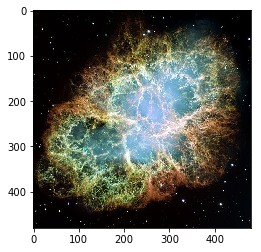

In [24]:
import matplotlib.pyplot as plt
from scipy.misc import imread
%matplotlib inline

from io import BytesIO # File-Like object in memory

img = BytesIO(process.stdout)

plt.imshow(imread(img))

# `threading`, `multiprocessing`: Doing stuff in parallel

There are much more advanced libraries for this, e.g. `joblib`

https://pythonhosted.org/joblib/

Python can only run one python statement at a time through one interpreter, even
when using multiple threads, only one thread at a time will be executed. 
This is called the **Global Interpreter Lock** (GIL).

So you only gain in perfomance using threads, when:

* there are I/O bound operations (Reading files, downloads, waiting on sockets)
* When you use a lot of c-extensions (like numpy, pandas and basically all the scientific python stack)
* sleeping

For truly parallel operations, you need new python processes, this can be done with the `multiprocessing` module.

In [25]:
from random import random
import time

def do_work():
    time.sleep(random())
    print('hello')
    time.sleep(1)
    print('world')

for i in range(3):
    do_work()

hello
world
hello
world
hello
world


In [27]:
from threading import Thread


threads = [Thread(target=do_work) for i in range(3)]

for t in threads:
    t.start()

# block until all threads are done
for t in threads:
    t.join()

hello
hello
hello
world
world
world


In [28]:
import random


def pi_mc(n):
    n_circle = 0
    for i in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        
        if (x**2 + y**2) <= 1:
            n_circle += 1
    
    return 4 * n_circle / n


In [29]:
from multiprocessing import Pool

n_jobs = 100
n_iters = 100000
iterable = [n_iters] * n_jobs

print(iterable)

with Pool(4) as pool:
    results = pool.map(pi_mc, iterable)
  
print(sum(results) / len(results))

[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
3.1413179999999996


# `collections`: Useful Containers

example: count words

In [30]:
text = '''Alice was beginning to get very tired of sitting by her sister on the bank,
and of having nothing to do:
once or twice she had peeped into the book her sister was reading,
but it had no pictures or conversations in it,
`and what is the use of a book,'
thought Alice
`without pictures or conversation?'
So she was considering in her own mind (as well as she could,
for the hot day made her feel very sleepy and stupid),
whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies,
when suddenly a White Rabbit with pink eyes ran close by her.

There was nothing so very remarkable in that;
nor did Alice think it so very much out of the way to hear the Rabbit say to itself,
`Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards,
it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural);
but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and then hurried on,
Alice started to her feet,
for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket,
or a watch to take out of it, and burning with curiosity, she ran across the field after it,
and fortunately was just in time to see it pop down a large rabbit-hole under the hedge.
'''

In [31]:
# remove punctuation
text = text.translate({ord(c): None for c in ',`;.!:?()\''})
print(text)

Alice was beginning to get very tired of sitting by her sister on the bank
and of having nothing to do
once or twice she had peeped into the book her sister was reading
but it had no pictures or conversations in it
and what is the use of a book
thought Alice
without pictures or conversation
So she was considering in her own mind as well as she could
for the hot day made her feel very sleepy and stupid
whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies
when suddenly a White Rabbit with pink eyes ran close by her

There was nothing so very remarkable in that
nor did Alice think it so very much out of the way to hear the Rabbit say to itself
Oh dear Oh dear I shall be late when she thought it over afterwards
it occurred to her that she ought to have wondered at this but at the time it all seemed quite natural
but when the Rabbit actually took a watch out of its waistcoat-pocket and looked at it and then hurried on
Alice started to

In [32]:
# solution one, pure python

counts = {}
for word in text.split():
    if word not in counts:
        counts[word] = 0
    counts[word] += 1

for name, count in sorted(counts.items(), key=lambda s: s[1], reverse=True)[:10]:
    print(name, count)

the 13
it 11
to 9
of 8
her 8
and 8
a 8
she 7
was 5
Alice 4


`collections.defaultdict` takes a function that initialises entries

In [33]:
# solution 2, using default dict
from collections import defaultdict

counts = defaultdict(int)  # int() returns 0

for word in text.split():
    counts[word] += 1

for name, count in sorted(counts.items(), key=lambda s: s[1], reverse=True)[:10]:
    print(name, count)

the 13
it 11
to 9
of 8
her 8
and 8
a 8
she 7
was 5
Alice 4


In [34]:
# solution 3, Counter
from collections import Counter

counts = Counter(text.split())
for word, count in counts.most_common(10):
    print(word, count)

the 13
it 11
to 9
of 8
her 8
and 8
a 8
she 7
was 5
Alice 4


In [35]:
color = (1.0, 0, 0, 1.0) ## what is this? RGBA? CMYK? Something else

In [37]:
from collections import namedtuple

RGBAColor = namedtuple('RGBAColor', ['r', 'g', 'b', 'a'])
color = RGBAColor(1.0, 0, 0, 1.0)
color

RGBAColor(r=1.0, g=0, b=0, a=1.0)

# `functools`: functional programming in python

In [38]:
import functools

# reduce was a builtin in py2
functools.reduce(lambda v1, v2: v1 + v2, range(100)) 

4950

In [39]:
newline_print = functools.partial(print, sep='\n')

newline_print(*range(5))

0
1
2
3
4


In [40]:
def fib(n):
    if n == 0:
        return 0
    if n in (1, 2):
        return 1
    else:
        return fib(n - 1) + fib(n - 2)
    

@functools.lru_cache(maxsize=500)
def fib_cached(n):
    if n == 0:
        return 0
    if n in (1, 2):
        return 1
    else:
        return fib(n - 1) + fib(n - 2)
    
fib(10)

print('cached')
fib_cached(7)

cached


13

In [41]:
%%timeit
fib(15)

236 µs ± 42.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
%%timeit
fib_cached(15)

112 ns ± 2.05 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


# `re`, regular expressions

In [43]:
import re

In [44]:
files = ['img001.png', 'img002.png', 'world.txt', 'foo.txt', 'stuff.dat', 'test.xslx']


for f in files:
    
    m = re.match('img([0-9]{3}).png', f)
    if m:
        print(f, m.groups())

img001.png ('001',)
img002.png ('002',)


# itertools, more iterations

In [45]:
import itertools

In [46]:
longer = [1, 2, 3, 4, 5]
shorter = ['a', 'b', 'c']

print('{:-^40}'.format(' zip '))
for l, s in zip(longer, shorter):
    print(l, s)

print('{:-^40}'.format(' zip_longest '))
for l, s in itertools.zip_longest(longer, shorter):
    print(l, s)
    
print('{:-^40}'.format(' zip_longest, with fillvalue'))
for l, s in itertools.zip_longest(longer, shorter, fillvalue='z'):
    print(l, s)

----------------- zip ------------------
1 a
2 b
3 c
------------- zip_longest --------------
1 a
2 b
3 c
4 None
5 None
------ zip_longest, with fillvalue------
1 a
2 b
3 c
4 z
5 z


In [47]:
list(itertools.permutations('ABC'))

[('A', 'B', 'C'),
 ('A', 'C', 'B'),
 ('B', 'A', 'C'),
 ('B', 'C', 'A'),
 ('C', 'A', 'B'),
 ('C', 'B', 'A')]

In [48]:
list(itertools.combinations('ABC', 2))

[('A', 'B'), ('A', 'C'), ('B', 'C')]

# `argparse`: commandline options

Alternatives:

- `click`: http://click.pocoo.org/6/
- `docopt`: http://docopt.org/

In [49]:
from argparse import ArgumentParser

parser = ArgumentParser()
parser.add_argument('inputfile') # positional argument
parser.add_argument('-o', '--output') # option
parser.add_argument('-n', '--number', default=0, type=int) # option with default value and type

None

In [50]:
args = parser.parse_args(['data.csv']) # of no arguments give,  use sys.argv
print(args.number, args.inputfile, args.output)

0 data.csv None


In [51]:
args = parser.parse_args(['data.csv', '--number=5', '-o',  'test.csv'])

print(args.number, args.inputfile, args.output)

5 data.csv test.csv


# `copy`, copy operations

In [52]:
a = [1, 2, [4, 5]]
b = a
b[1] = 3
b[2][1] = 'Hello'

print(a)
print(b)

[1, 3, [4, 'Hello']]
[1, 3, [4, 'Hello']]


In [53]:
from copy import copy

a = [1, 2, [4, 5]]
b = copy(a)
b[1] = 3
b[2][1] = 'Hello'

print(a)
print(b)

[1, 2, [4, 'Hello']]
[1, 3, [4, 'Hello']]


In [54]:
from copy import deepcopy

a = [1, 2, [4, 5]]
b = deepcopy(a)
b[1] = 3
b[2][1] = 'Hello'

print(a)
print(b)

[1, 2, [4, 5]]
[1, 3, [4, 'Hello']]


# `tempfile`, Tempory Files and Directories

In [55]:
import tempfile
import os

print(tempfile.gettempdir())

# file will be deleted when exiting the with block
with tempfile.NamedTemporaryFile(prefix='python_course_', suffix='.txt', mode='w') as f:
    path = f.name
    f.write('Hello World')

    print('f exists:', os.path.exists(path))

print('f exists:', os.path.exists(path))

/tmp
f exists: True
f exists: False


In [56]:
# directory with all contents will be deleted when we exit the with block
with tempfile.TemporaryDirectory() as d:
    print(d)
    
    with open(os.path.join(d, 'myfile.txt'), 'w') as f:
        print(f.name)
        f.write('Hello World')
        
        print('d exists:', os.path.exists(d))

print('d exists:', os.path.exists(d))

/tmp/tmpi4boajzt
/tmp/tmpi4boajzt/myfile.txt
d exists: True
d exists: False


# `struct`, parsing binary data

It's like every other day in the office. Your supervisor does not like standardized file formats.
Like `.fits`, or `.hdf` or, ("Are you completely insane?") `.json` or `.yaml`.
Because, you know, they are super hard to read using Fortran 77.

So he sends you data in "an easy to read" file format, a custom, proprietary binary blob:

* First 4 bytes is an unsigned integer, containing the length of the comment string
* Then N bytes comment encoded using utf-8
    * utf-8? Are you kidding me? ASCII!!!
* Then triples of double, double, unsigned int for x, y, n

In [57]:
import random
import struct

In [58]:
# pack data
struct.pack('II', 2, 1024) # pack to unsigned 32bit integers 

b'\x02\x00\x00\x00\x00\x04\x00\x00'

In [59]:
# unpack data
struct.unpack('f', b'\xdb\x0f\x49\x40') # 32-bit float

(3.1415927410125732,)

In [60]:
# create a binary file, let's add a comment first
with open('letsinventourownbinaryformat.dat', 'wb') as f:
    comment = 'Here, have this awesome data!'.encode('ascii')

    f.write(struct.pack('I', len(comment)))
    f.write(comment)
    
    for i in range(1000):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        n = random.randint(1, 200 - int(100 * (x**2 + y**2)))
        
        f.write(struct.pack('ddI', x, y, n))

In [62]:
# read the file back in

xs, ys, ns = [], [], []
with open('letsinventourownbinaryformat.dat', 'rb') as f:
    comment_length, = struct.unpack('I', f.read(4))
    comment = f.read(comment_length).decode('ascii')
    
    size = struct.calcsize('ddI')
    data = f.read(size)
    while data:
        x, y, n = struct.unpack('ddI', data)
        xs.append(x)
        ys.append(y)
        ns.append(n)
        data = f.read(size)

print(comment)
print(len(xs))

Here, have this awesome data!
1000


# `email`, `smtplib`, `getpass`

In [ ]:
import smtplib
from email.message import EmailMessage
from getpass import getpass

text = '''Hello Participants,

Thanks for attending!
Do not forget to provide feedback

Cheers,
Max
'''

msg = EmailMessage()
msg.set_content(text)


msg['Subject'] = 'Email demonstration at the Python Course'
msg['From'] = 'Firstname Surname <email address>'
msg['To'] = 'Firstname Surname <email address>, Firstname Surname <email address>'

# Send the message via our own SMTP server.
s = smtplib.SMTP_SSL(host='server')



s.login(input('Username: '), getpass('Enter password: '))

s.send_message(
    from_addr=msg['From'], 
    to_addrs=msg['To'],
    msg=msg,
)
s.quit()